In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
data = pd.read_csv('Iris.csv')
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
new_data = list(data.columns[2:])

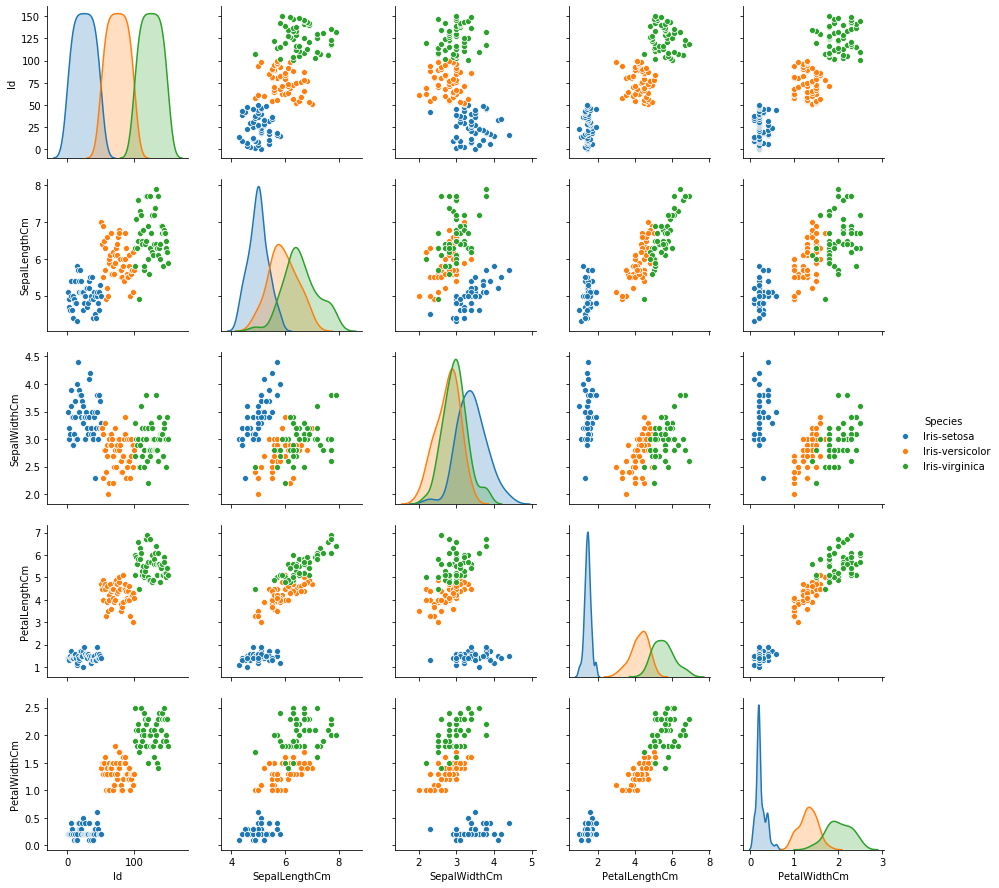

In [12]:
sns.pairplot( data , hue = 'Species')
plt.show()

In [13]:

#  import Label Encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Encode labels in Column Species
data['Species'] = label_encoder.fit_transform(data['Species'])
data['Species'].unique()

array([0, 1, 2], dtype=int64)

In [14]:
X = data.drop(['Species', 'Id'],axis = 1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y = pd.Series(data.Species)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size = 0.3,random_state = 0)

In [17]:

from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [18]:
from sklearn.metrics import classification_report
y_pred = dt.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [20]:
from sklearn import tree
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_3 <= 0.75
|   |--- class: 0
|--- feature_3 >  0.75
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  1.75
|   |   |   |--- class: 2



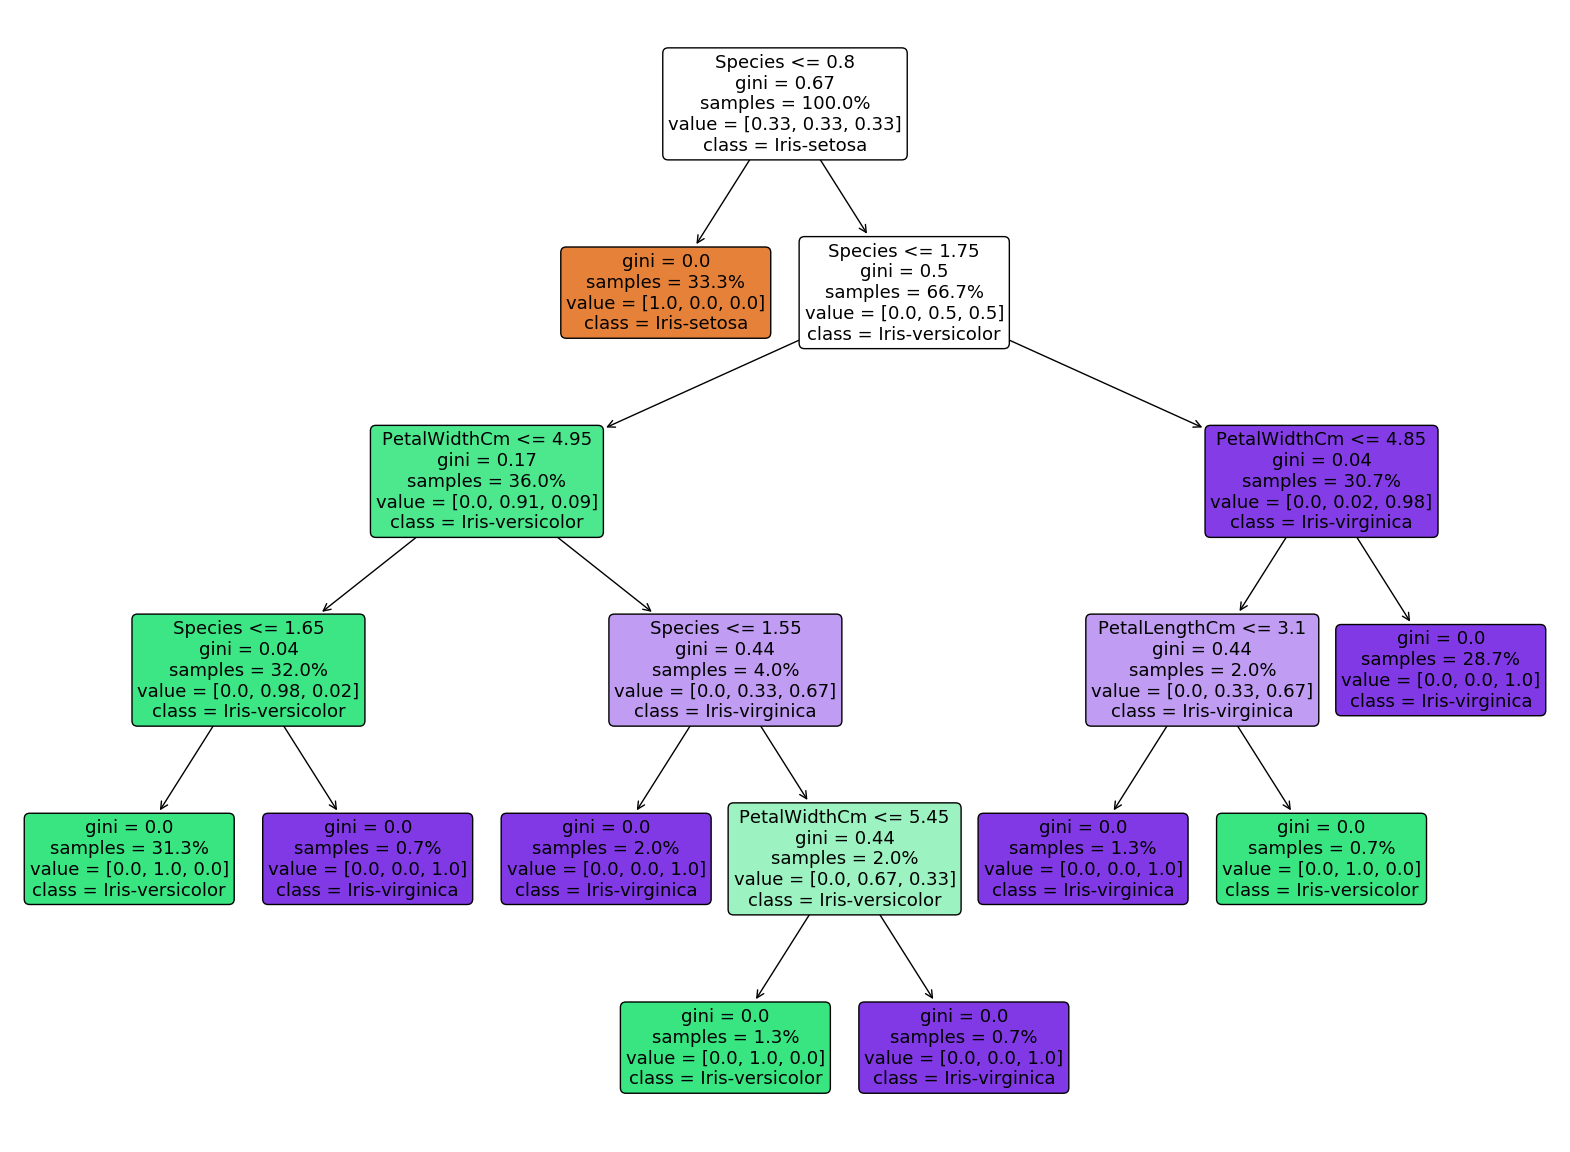

In [22]:
plt.figure(figsize =(20,15), facecolor = 'white', dpi = 100)
dt.fit(X,y)
target = ['Iris-setosa','Iris-versicolor','Iris-virginica']
tree_plt = tree.plot_tree(dt, feature_names = new_data , fontsize = 13,class_names = target , precision = 2, proportion = True, filled = True , rounded = 10)
plt.show()


In [24]:
dtc= DecisionTreeClassifier(criterion = "entropy",max_depth = 3, random_state = 0,presort = False, splitter='best')
dtc = dtc.fit(X_train,y_train)
dtc

C:\Users\91992\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [25]:

y_pred = dtc.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

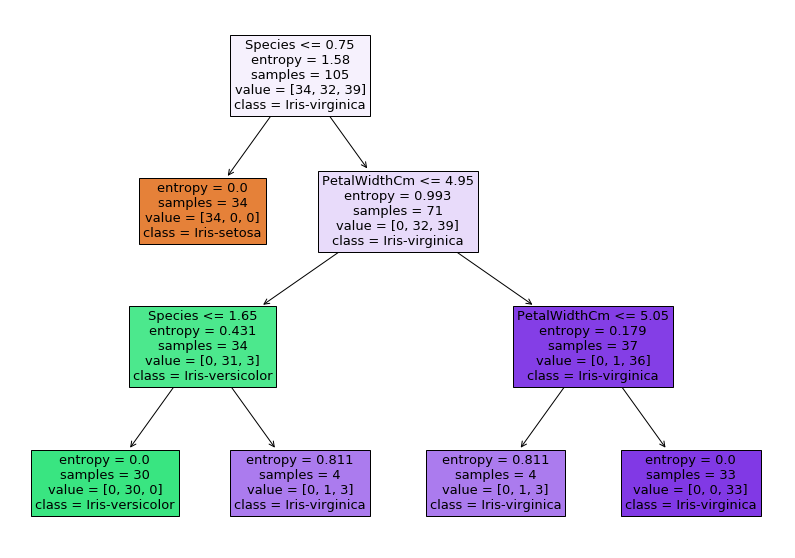

In [26]:
fig = plt.figure(figsize = (14,10))
plot_tree1= tree.plot_tree(dtc, feature_names = new_data ,fontsize = 13,filled = True, class_names = target)